# Computation of NPP inter-annual variability and secular trends 

### UKESM model output

Prior to this analysis, we have already completed the following steps:
- Regridded the UKESEM output from its native irregular grid to a regular 1x1 degree grid
- Concatenated the final 100 years of the *picontrol*, the *historical* and the *SSP585* experiments

**Import packages**

In [15]:
!pwd

import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.cm as cm


/home/users/train013/CMIP6_hackathon


**Import the pre-processed data**

In [19]:
data = nc.Dataset('/gws/pw/j05/cop26_hackathons/bristol/project09/data/ETOPO_intpp_Omon_UKESM1-0-LL_historical_r1i1p1f2_185001-201412_yearmonths.nc')

npp = data.variables['intpp'][100::,:,:,:]*86400*12  # convert from mol m-2 s-1 --> g m-2 s-1
lon = data.variables['ETOPO60X'][...]
lat = data.variables['ETOPO60Y'][...]
month = data.variables['time'][...]
year = np.arange(1950.5,2014.6,1)

print(np.shape(npp))
print(np.shape(lon))
print(np.shape(lat))
print(np.shape(month))
print(np.shape(year))

(65, 12, 180, 360)
(360,)
(180,)
(12,)
(65,)


**Calculate the average NPP, the inter-annual variability and trends over the historical period**

In [20]:
npp_ave = np.ma.average(npp, axis=0)
npp_var = np.ma.std(npp, axis=0)
npp_dif = npp[1::,:,:,:] - npp[0:-1,:,:,:]
npp_tre = np.ma.average(npp_dif, axis=0)
# annual average
npp_ave = np.ma.average(npp_ave, axis=0)
npp_var = np.ma.average(npp_var, axis=0)
npp_tre = np.ma.average(npp_tre, axis=0)


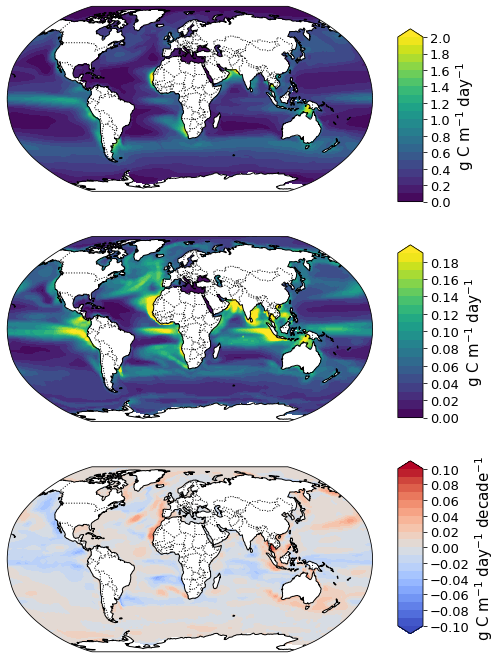

In [23]:
proj = ccrs.Orthographic(central_longitude=-20.0, central_latitude=0.0, globe=None)
proj = ccrs.Robinson(central_longitude=20)

levs1 = np.arange(0,21,1)*0.1
levs2 = np.arange(0,20,1)*0.01
levs3 = np.arange(-10,11,1)*0.01

colmap1 = cm.viridis
colmap2 = cm.viridis
colmap3 = cm.coolwarm

fstic = 13
fslab = 15


fig = plt.figure(figsize=(7,12))
gs = GridSpec(3,1)

ax1 = plt.subplot(gs[0], projection=proj)
#ax1.set_extent([-20,50,-40,45], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.coastlines()
p1 = plt.contourf(lon, lat, npp_ave, transform=ccrs.PlateCarree(), cmap=colmap1, levels=levs1, vmin=np.min(levs1), vmax=np.max(levs1), extend='max')

ax2 = plt.subplot(gs[1], projection=proj)
#ax2.set_extent([-20,50,-40,45], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.coastlines()
p2 = plt.contourf(lon, lat, npp_var, transform=ccrs.PlateCarree(), cmap=colmap2, levels=levs2, vmin=np.min(levs2), vmax=np.max(levs2), extend='max')

ax3 = plt.subplot(gs[2], projection=proj)
#ax3.set_extent([-20,50,-40,45], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.coastlines()
p3 = plt.contourf(lon, lat, npp_tre*10, transform=ccrs.PlateCarree(), cmap=colmap3, levels=levs3, vmin=np.min(levs3), vmax=np.max(levs3), extend='both')


plt.subplots_adjust(right=0.85)

cbax1 = fig.add_axes([0.9, 0.65, 0.05, 0.2])
cbar1 = plt.colorbar(p1, cax=cbax1, orientation='vertical', ticks=levs1[::2])
cbar1.ax.set_ylabel('g C m$^{-1}$ day$^{-1}$', fontsize=fslab)
cbar1.ax.tick_params(labelsize=fstic)

cbax2= fig.add_axes([0.9, 0.4, 0.05, 0.2])
cbar2= plt.colorbar(p2, cax=cbax2, orientation='vertical', ticks=levs2[::2])
cbar2.ax.set_ylabel('g C m$^{-1}$ day$^{-1}$', fontsize=fslab)
cbar2.ax.tick_params(labelsize=fstic)

cbax3= fig.add_axes([0.9, 0.15, 0.05, 0.2])
cbar3= plt.colorbar(p3, cax=cbax3, orientation='vertical', ticks=levs3[::2])
cbar3.ax.set_ylabel('g C m$^{-1}$ day$^{-1}$ decade$^{-1}$', fontsize=fslab)
cbar3.ax.tick_params(labelsize=fstic)

fig.savefig('UKESM_intpp_ave_std_tre.png', dpi=300, bbox_inches='tight')
